<a href="https://www.kaggle.com/code/manojs048/diamond-price-prediction-by-regression-models?scriptVersionId=123839536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center> Diamonds


# Analyze diamonds by their cut, color, clarity, price, and other attributes

# About Dataset
## Context
### This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

# Content
### price price in US dollars (\$326--\$18,823)

### carat weight of the diamond (0.2--5.01)

### cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

### color diamond colour, from J (worst) to D (best)

### clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### x length in mm (0--10.74)

### y width in mm (0--58.9)

### z depth in mm (0--31.8)

### depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

### table width of top of diamond relative to widest point (43--95)

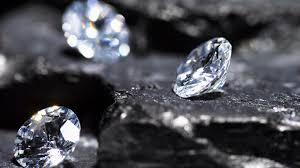

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/diamind-price/Diamond Price.csv')
df

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.shape

(53940, 10)

In [4]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.nunique()

Carat(Weight of Daimond)      273
Cut(Quality)                    5
Color                           7
Clarity                         8
Depth                         184
Table                         127
Price(in US dollars)        11602
X(length)                     554
Y(width)                      552
Z(Depth)                      375
dtype: int64

In [9]:
df.isnull()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [11]:
df.corr()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
Carat(Weight of Daimond),1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
Depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
Table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
Price(in US dollars),0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
X(length),0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
Y(width),0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
Z(Depth),0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

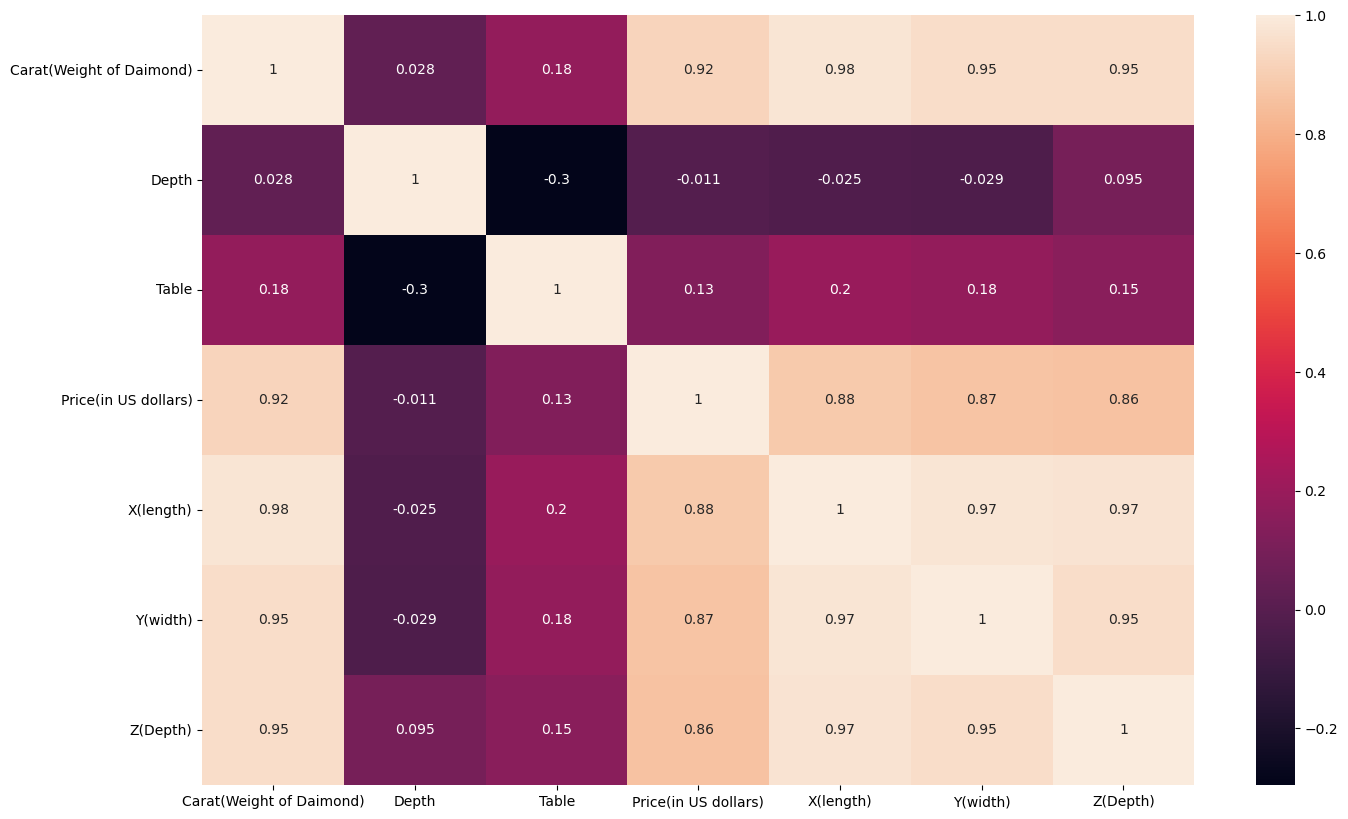

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

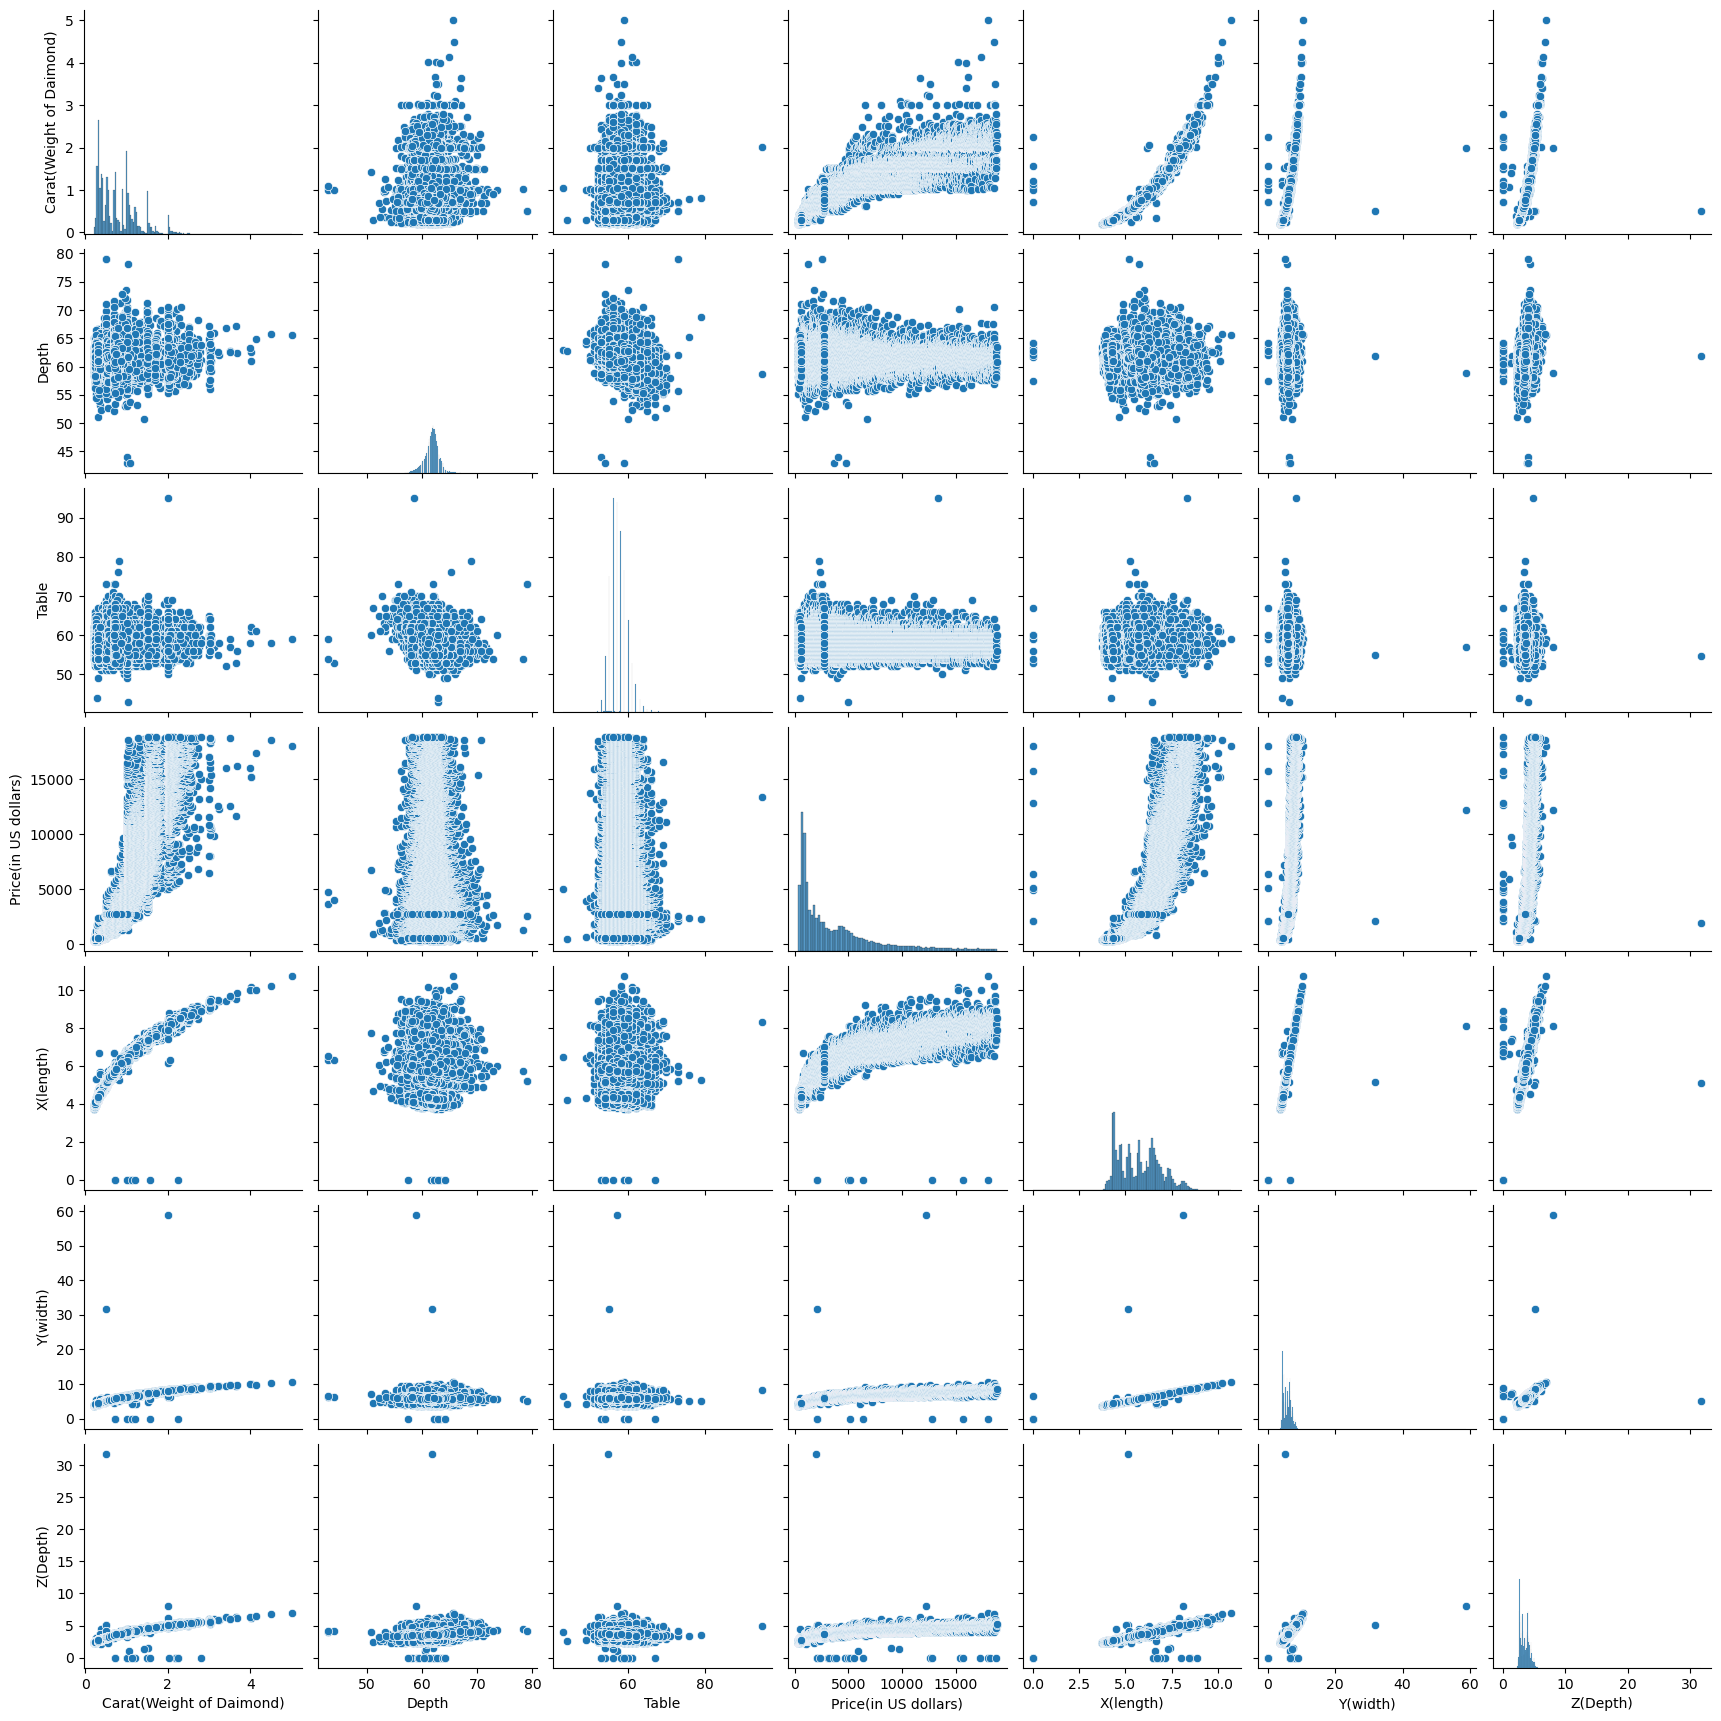

In [13]:
sns.pairplot(data=df, palette='gist_rainbow')
plt.show()

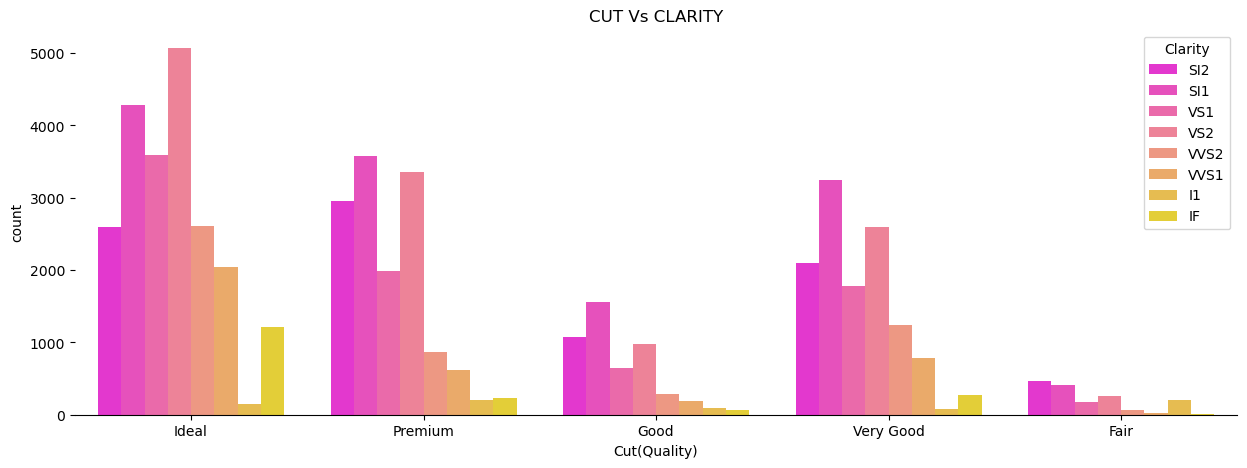

In [14]:
plt.figure(figsize = (15,5))
ax = sns.countplot(x= 'Cut(Quality)', hue = 'Clarity', data= df, palette = 'spring')
ax.set(title = 'CUT Vs CLARITY')
sns.despine(top=True, right=True, left=True)
plt.show()

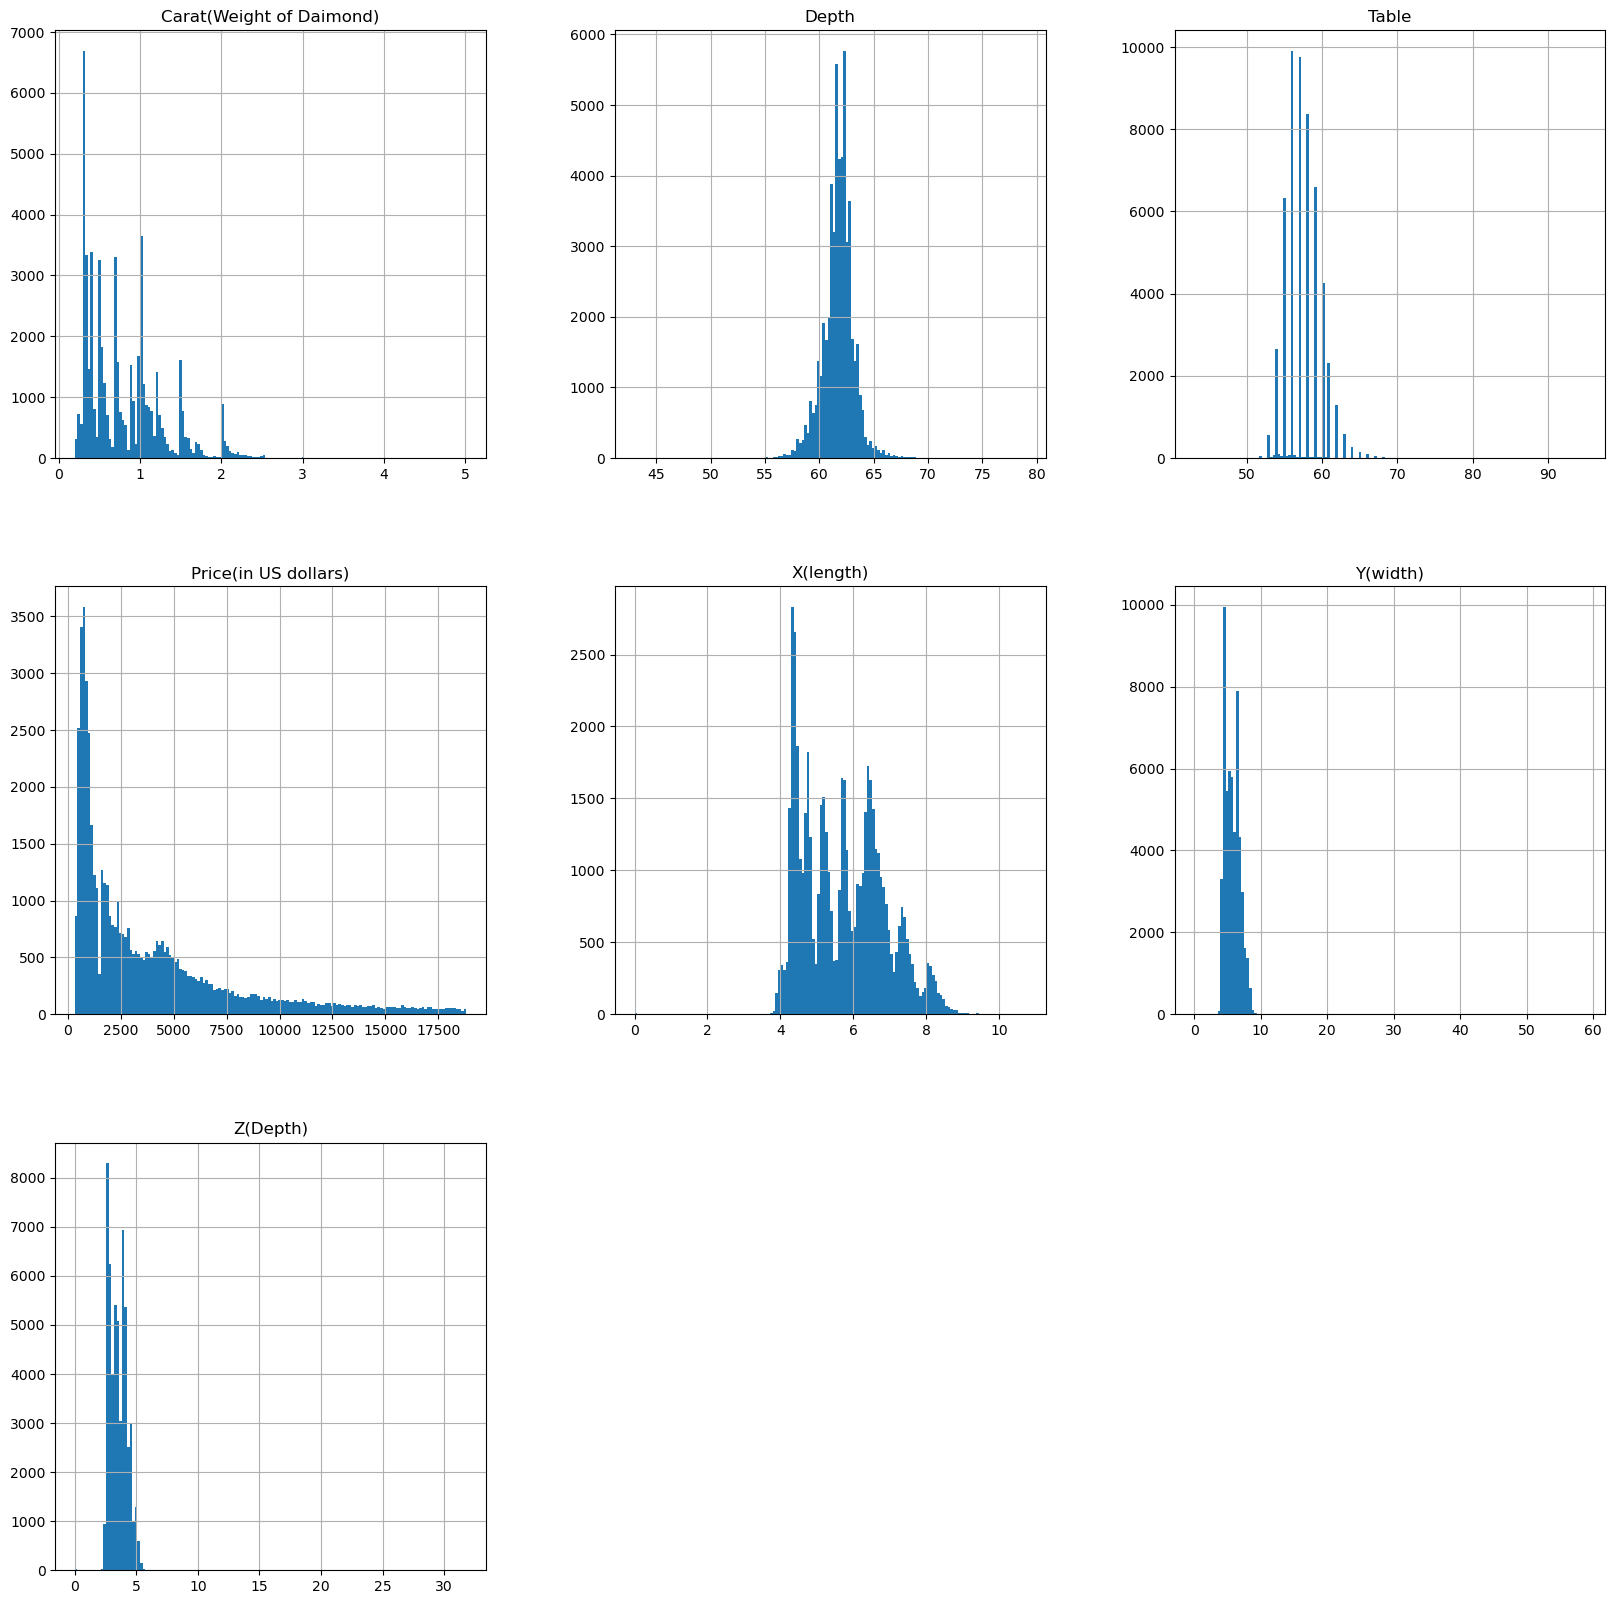

In [15]:
df.hist(figsize = (20,20),bins=150)
plt.show()

In [16]:
#sns.factorplot(x='Color', data=df , kind='count',aspect=2.5 )

# Exploratory Data Analysis

<AxesSubplot:xlabel='Cut(Quality)', ylabel='Price(in US dollars)'>

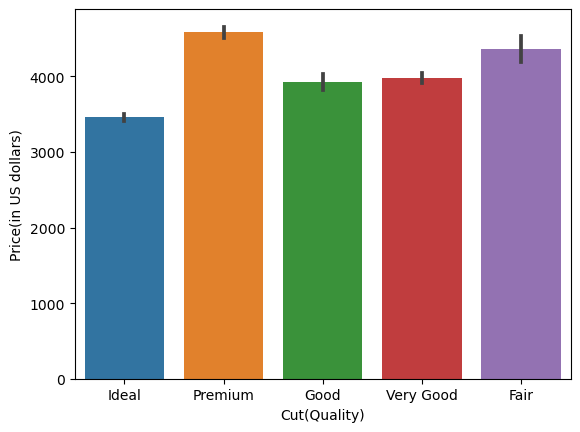

In [17]:
sns.barplot(data=df, x="Cut(Quality)", y="Price(in US dollars)")
#Premium Quality has the highest price for diamond

<AxesSubplot:xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

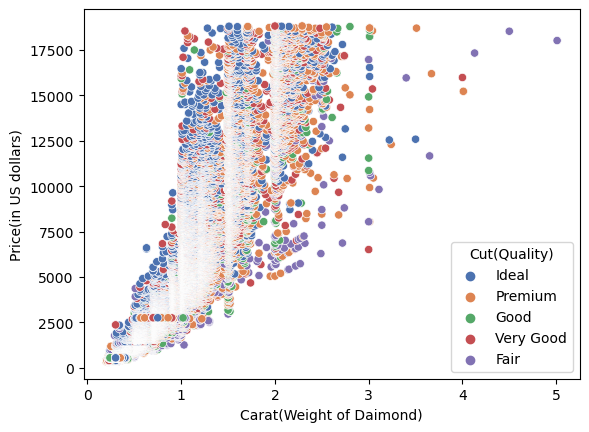

In [18]:
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)", hue="Cut(Quality)", palette="deep")

<AxesSubplot:xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

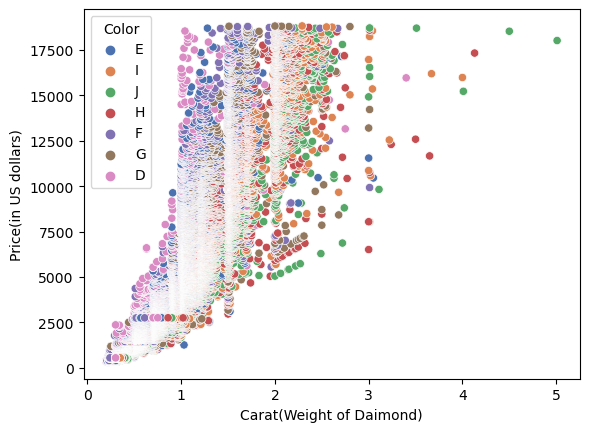

In [19]:
sns.scatterplot(data=df, x="Carat(Weight of Daimond)", y="Price(in US dollars)", hue="Color", palette="deep")

<AxesSubplot:xlabel='Color', ylabel='Price(in US dollars)'>

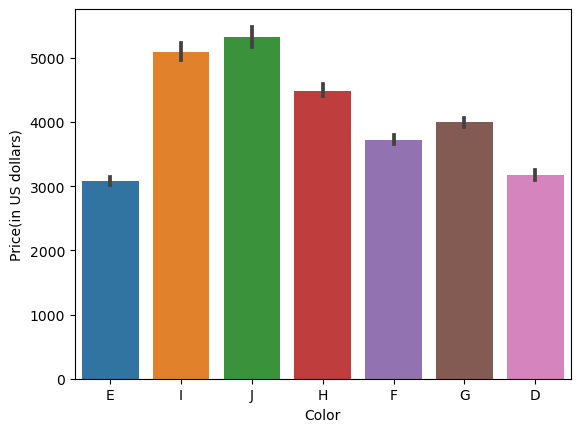

In [20]:
sns.barplot(data=df, x="Color", y="Price(in US dollars)")

<AxesSubplot:xlabel='Clarity', ylabel='Price(in US dollars)'>

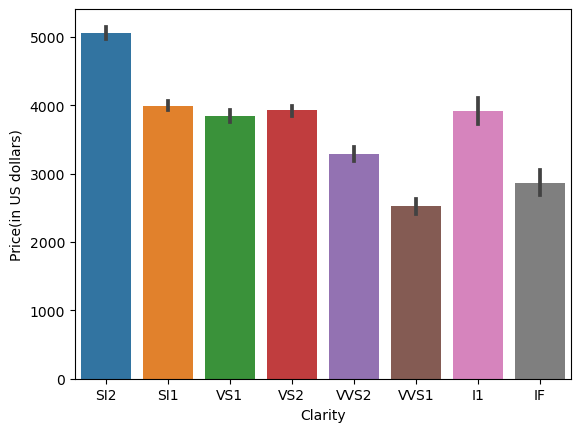

In [21]:
sns.barplot(data=df, x="Clarity", y="Price(in US dollars)")
#SI2 has the highest clarity price

# Data Preprocessing

In [22]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [23]:
df.dtypes

Carat(Weight of Daimond)    float64
Cut(Quality)                 object
Color                        object
Clarity                      object
Depth                       float64
Table                       float64
Price(in US dollars)          int64
X(length)                   float64
Y(width)                    float64
Z(Depth)                    float64
dtype: object

In [24]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

# Machine Learning Model Building

In [25]:
x= df.drop('Price(in US dollars)', axis=1)
y = df['Price(in US dollars)']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# define X_train, y_train, and y_test

# create a list of regression models to test
models = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(),
          RandomForestRegressor(), SVR(), Lasso()]

# iterate over each model, fit it to training data, generate predictions on test data,
# and calculate evaluation metrics
for model in models:
    # instantiate the model
    regressor = model
    
    # fit the model to the training data
    regressor.fit(x_train, y_train)
    
    # generate predictions on test data
    y_pred = regressor.predict(x_test)
    
    # calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # print the evaluation metrics for the current model
    print("Model:", type(regressor).__name__)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)
    print()


Model: LinearRegression
Mean Absolute Error: 858.7084697710086
Root Mean Squared Error: 1351.263479683125
R-squared: 0.8851397433679632

Model: DecisionTreeRegressor
Mean Absolute Error: 354.6272710418984
Root Mean Squared Error: 720.8537553394228
R-squared: 0.9673123247826518

Model: KNeighborsRegressor
Mean Absolute Error: 480.7829625509825
Root Mean Squared Error: 891.712953270712
R-squared: 0.9499804414694631

Model: RandomForestRegressor
Mean Absolute Error: 267.893934552501
Root Mean Squared Error: 541.6002602267886
R-squared: 0.981547830629092

Model: SVR
Mean Absolute Error: 2747.3256009251854
Root Mean Squared Error: 4217.949200137972
R-squared: -0.11916055102542833

Model: Lasso
Mean Absolute Error: 860.5241879759136
Root Mean Squared Error: 1351.3904327960533
R-squared: 0.8851181597873455



In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
from sklearn import metrics
import math
y_pred = dtree.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 354.16439562476825
MSE is 524367.0390480163
R2 score is 0.9669204129976543
RMSE score is 724.1319210254553


# Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [32]:
from sklearn import metrics
import math
y_pred = rf.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 266.16424879973925
MSE is 294799.9292444162
R2 score is 0.9814026069879784
RMSE score is 542.9548132620395
